In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
regions = gpd.read_file("Map_of_Regions_in_Ghana.shp.zip")

In [ ]:
regions.head()

Region                                           geometry
0        Ashanti  POLYGON ((686446.075 842986.894, 686666.193 84...
1    Brong Ahafo  POLYGON ((549970.457 968447.094, 550073.003 96...
2        Central  POLYGON ((603176.584 695877.238, 603248.424 69...
3        Eastern  POLYGON ((807307.254 797910.553, 807311.908 79...
4  Greater Accra  POLYGON ((858081.638 676424.913, 858113.115 67...

In [ ]:
print(region.crs)

EPSG:32630


**SETTING THE CRS**

In [ ]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("health_facilities.csv")
#facilities.head()
# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the cordinate reference system (CRS) to EPSG 4326
facilities.crs = "EPSG:4326"


In [ ]:
# View the first five rows of the GeoDataFrame
facilities.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude                  geometry  
0      Afrancho        CHAG   7.40801   -1.96317  POINT (-1.96317 7.40801)  
1  Anwiankwanta     Private   6.46312   -1.58592  POINT (-1.58592 6.46312)  
2   Aboabo No 2  Government   6.22393   -1.34982  POINT (-1.34982 6.22393)  
3     Aboabogya  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)  
4        Aboaso  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)

**Re-Projecting**

<Axes: >

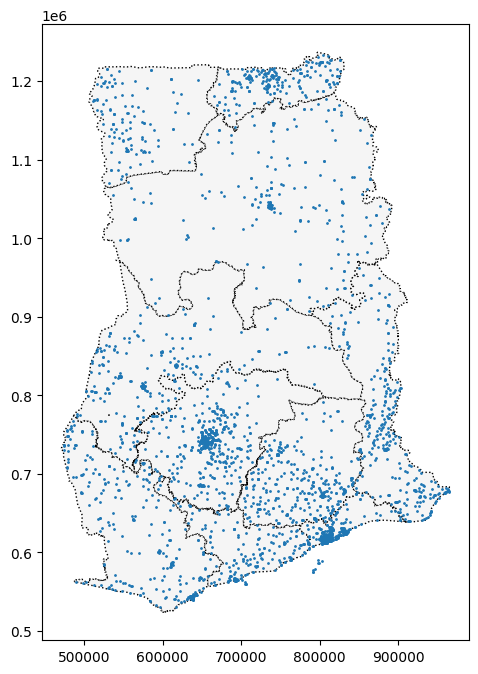

In [ ]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [ ]:
# The to_crs() method modifies only the "geometry" column: all other columns are left as-is
# The latitude and Longitude columns are unchanged
facilities.to_crs(epsg=32630).head()

Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude  \
0      Afrancho        CHAG   7.40801   -1.96317   
1  Anwiankwanta     Private   6.46312   -1.58592   
2   Aboabo No 2  Government   6.22393   -1.34982   
3     Aboabogya  Government   6.84177   -1.61098   
4        Aboaso  Government   6.84177   -1.61098   

                        geometry  
0  POINT (614422.662 818986.851)  
1  POINT (656373.863 714616.547)  
2  POINT (682573.395 688243.477)  
3   POINT (653484.49 756478.812)  
4   POINT (653484.49 756478.812)

In [ ]:
# When EPGS code is not available
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

Region                                           geometry
0        Ashanti  POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ...
1    Brong Ahafo  POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ...
2        Central  POLYGON ((-2.06723 6.29473, -2.06658 6.2942, -...
3        Eastern  POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ...
4  Greater Accra  POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0....

**ATTRIBUTE OF GEOMETRIC OBJECTS**

In [ ]:
# Get the X-cordinates of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [ ]:
facilities.geometry.head().length

<ipython-input-36-5723c5c3157c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  facilities.geometry.head().length


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [ ]:
facilities.geometry.head().area

<ipython-input-37-48cf4a4a550e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  facilities.geometry.head().area


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [ ]:
# Calculate the areas(in square meters) of each polygon in the GeoDataFrame
regions.loc[:, "AREA"] = regions.geometry.area  /  10**6

In [ ]:

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))

Area of Ghana: 239584.5760055668 square kilometers


In [ ]:
print("crs:", regions.crs)

crs: EPSG:32630


In [ ]:
regions.head()

Region                                           geometry  \
0        Ashanti  POLYGON ((686446.075 842986.894, 686666.193 84...   
1    Brong Ahafo  POLYGON ((549970.457 968447.094, 550073.003 96...   
2        Central  POLYGON ((603176.584 695877.238, 603248.424 69...   
3        Eastern  POLYGON ((807307.254 797910.553, 807311.908 79...   
4  Greater Accra  POLYGON ((858081.638 676424.913, 858113.115 67...   

           AREA  
0  24379.017777  
1  40098.168231  
2   9665.626760  
3  18987.625847  
4   3706.511145

**The one that contains the geometry is used for plot the boundaries(ax = ...)**

**While the GeoDataFrame(with latitude and longitude) is used for main plotting**